# Exploratory Data Analysis on Global Terrorism

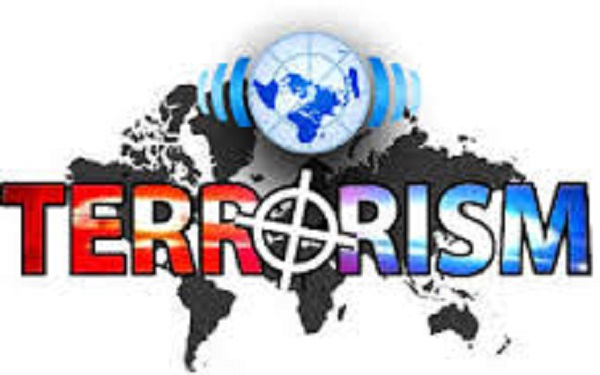

## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import os 
import mpl_toolkits
import json

## Reading and Exploring Data

In [ ]:
# Storing Data in DataFrame
df_terrorism= pd.read_csv(r"../input/tsf-datasets/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

In [ ]:
df_terrorism.head()

In [ ]:
# Dimensions of the DataFrame
df_terrorism.shape

## Cleaning DataFrame

In [ ]:
# Selecting Wanted columns
usecols = [1, 5, 8, 10, 11, 12, 13, 14, 25, 26, 27, 29, 35, 58, 69, 71, 82, 98, 100, 101, 103, 104, 106]
renamecols = {
    'latitude': 'lat',
    'longitude': 'lon',
    'iyear': u'year',
    'country_txt': u'country',
    'region_txt': u'region',
    'provstate': u'state',
    'attacktype1_txt': u'attacktype',
    'targtype1_txt': u'targettype',
    'weaptype1_txt': u'weapontype',
    'nperps': u'nter',
    'nkill': u'nkilled',
    'nkillter': u'nkilledter',
    'nwound': u'nwounded',
    'nwoundte': u'nwoundedter',
    'propextent_txt': u'propertyextent'
}

In [ ]:
df_terrorism= pd.read_csv(r"../input/tsf-datasets/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1',usecols=usecols)
df_terrorism.rename(columns=renamecols, inplace=True)
df_terrorism = df_terrorism.apply(lambda x: x.encode('utf-8').strip() if isinstance(x, str) else x)

In [ ]:
df_terrorism.shape

In [ ]:
df_terrorism.head()

In [ ]:
# Removing unknown values in the coordinates
df_terrorism = df_terrorism[pd.notnull(df_terrorism.lat)]
df_terrorism = df_terrorism[pd.notnull(df_terrorism.lon)]
print("Unknown values in the coordinates are removed succcessfully")

In [ ]:
# Unknowns in numeric columns
exclude_cols = ['year', 'lat', 'lon']
float_cols = [c for c in df_terrorism.select_dtypes(include=[float]).columns.tolist() if c not in exclude_cols]

In [ ]:
df_terrorism[float_cols] = df_terrorism[float_cols].fillna(0).astype(int)
df_terrorism[float_cols] = df_terrorism[float_cols].mask(df_terrorism[float_cols] < 0, 0)

In [ ]:
# Unknowns in string columns
str_cols = df_terrorism.select_dtypes(exclude=[float]).columns.tolist()
df_terrorism[str_cols] = df_terrorism[str_cols].fillna('Unknown')
# Many fields are dots which mean unknown value
df_terrorism[str_cols] = df_terrorism[str_cols].replace(r'^\.*$', 'Unknown', regex=True)

In [ ]:
# Limit Long strings
df_terrorism['weapontype'] = df_terrorism['weapontype'].replace(u'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Minor (likely < $1 million)', u'Minor (< $1 million)')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Major (likely > $1 million but < $1 billion)', u'Major (< $1 billion)')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Catastrophic (likely > $1 billion)', u'Catastrophic (> $1 billion)')

In [ ]:
# Number of duplicates values
df_terrorism.duplicated().sum()

In [ ]:
# Removal of duplicates values
df_terrorism.drop_duplicates(keep=False,inplace=True)

In [ ]:
# No more null values
df_terrorism.isnull().sum()

In [ ]:
print("Total Number of Null Values = ",df_terrorism.isnull().sum().sum())

In [ ]:
# Shape of Processed dataset
df_terrorism

In [ ]:
df_terrorism.shape

## Exploratory Data Analysis

In [ ]:
# Columns in the Dataset
df_terrorism.columns

In [ ]:
# Datatypes in the Dataframe
df_terrorism.dtypes

In [ ]:
df_terrorism.head()

In [ ]:
df_terrorism.tail()

In [ ]:
# Summary of Dataset
df_terrorism.info()

In [ ]:
# Count of Values in each column of DataFrame
df_terrorism.nunique()

In [ ]:
# Years in the DataFrame
df_terrorism["year"].unique()

In [ ]:
# Count of each year in the Data Frame
df_terrorism["year"].value_counts()

In [ ]:
# Total Count of the regions in the DataFrame
df_terrorism['region'].value_counts()

In [ ]:
# Total count of gname in the DataFrame
df_terrorism['gname'].value_counts()

In [ ]:
# Total count of cities in the DataFrame
df_terrorism['city'].value_counts()

In [ ]:
# Total count of Attack type in the DataFrame
df_terrorism['attacktype'].value_counts()

In [ ]:
# Total count of Target type in the DataFrame
df_terrorism['targettype'].value_counts()

In [ ]:
# Stastical Summary of Data
df_terrorism.describe()

In [ ]:
# Data in each column
for col in df_terrorism:
    print(df_terrorism[col].unique())

In [ ]:
# Correlation among the columns
df_terrorism.corr()

In [ ]:
# Covariance between set of variables
df_terrorism.cov()

In [ ]:
# Slicing Data
df_terrorism.iloc[0]

In [ ]:
df_terrorism.iloc[:,0] 

## Visualization of Data

In [ ]:
# Heat Map of the correlation among the columns
fig,axes = plt.subplots(1,1,figsize=(16,14))
sns.heatmap(df_terrorism.corr(), annot= True)
plt.show()

In [ ]:
# Heat map of the covariance among the set of variables
fig,axes = plt.subplots(1,1,figsize=(16,14))
sns.heatmap(df_terrorism.cov(), annot= True)
plt.show()

In [ ]:
# Visualization of missing values
sns.heatmap(df_terrorism.isnull(),yticklabels=False,cbar=False,cmap="viridis") 

In [ ]:
# Pie Plot of AttackTypes
plt.figure(figsize=(15,15))
df_terrorism['attacktype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [ ]:
# Pie Plot of TargetTypes
plt.figure(figsize=(15,15))
df_terrorism['targettype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [ ]:
# Pie Plot of WeaponTypes
plt.figure(figsize=(15,15))
df_terrorism['weapontype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [ ]:
# Pie Plot of Region
plt.figure(figsize=(15,15))
df_terrorism['region'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [ ]:
# Number of Terrorist Activities by Region
plt.subplots(figsize=(15,5))
sns.countplot('region',data=df_terrorism,palette='inferno',order=df_terrorism['region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

In [ ]:
# Number of Terrorist Activities Each Year
plt.subplots(figsize=(15,8))
sns.countplot('year',data=df_terrorism,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [ ]:
# Frequency of Attacks
plt.figure(figsize=(18,8))
sns.countplot(x=df_terrorism["year"], hue="success", data = df_terrorism)
plt.xlabel("Years")
plt.xticks(rotation=90)
plt.ylabel("Frequency of Attacks")

In [ ]:
# Attacking Methods of Terrorists
plt.subplots(figsize=(15,4))
sns.countplot('attacktype',data=df_terrorism,palette='inferno',order=df_terrorism['attacktype'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()

In [ ]:
# Frequency of each weapon used
plt.figure(figsize=(15,6))
sns.barplot(x= df_terrorism["weapontype"].value_counts()[:50].index,y = df_terrorism["weapontype"].value_counts()[:50].values)
plt.xlabel("Weapons used", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Frequency of a Particluar weapon used", fontsize=12)
plt.title("Types of Weapons", fontsize=20)

In [ ]:
#Attacking Methods by the Terrorists
plt.subplots(figsize=(15,6))
sns.countplot(x= 'attacktype', data=df_terrorism, palette='coolwarm',order=df_terrorism['attacktype'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

In [ ]:
# Different Target places for Terrorists to Attack
plt.subplots(figsize=(15,6))
sns.countplot('targettype',data=df_terrorism,palette='inferno',order=df_terrorism['targettype'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.title('Target by Terrorists')
plt.show()

In [ ]:
# Number of Terrorist Activities Countrywise
plt.figure(figsize=(20,6))
sns.barplot(x=df_terrorism['country'].value_counts()[:25].index, y=df_terrorism['country'].value_counts()[:25])
plt.xlabel("Countries")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [10,8]
plt.title("Number of Terrorist Activities Countrywise")

In [ ]:
# Number of Terrorist Activities Regionwise
sns.countplot(x= df_terrorism["region"], hue="success", data=df_terrorism)
plt.xlabel("Regions", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Terrorism Count", fontsize=20)
plt.title("Number of Terrorist Activities Regionwise", fontsize=20)

In [ ]:
# Terrorist Attack Year VS Region
df_region=pd.crosstab(df_terrorism.year,df_terrorism.region)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
plt.title("Terrorist Attack Year VS Region", fontsize=20)
fig.set_size_inches(15,8)
plt.show()

In [ ]:
# Terrorist Attack Year VS Target Type
df_region=pd.crosstab(df_terrorism.year,df_terrorism.targettype)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
plt.title("Terrorist Attack Year VS Target Type", fontsize=20)
fig.set_size_inches(15,8)
plt.show()

In [ ]:
# Wounded VS Year
d=df_terrorism.groupby(['year','region'])['nwounded'].sum()
plot_df_terrorism = d.unstack('region').loc[:]
plot_df_terrorism.index = pd.PeriodIndex(plot_df_terrorism.index.tolist(),freq='A')
plot_df_terrorism.plot(figsize=(15,8),color=sns.color_palette('Set2',12))
plt.title("Wounded Vs Year", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Wounded")

In [ ]:
# Histogram of the Data
df_terrorism.hist(figsize=(35,30))

In [ ]:
# Attacks VS Killed
count_terror = df_terrorism['country'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill=df_terrorism.groupby ('country')['nkilled'].sum().to_frame()
count_terror.merge(count_kill,left_index = True,right_index =True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
plt.title("Attacks VS Killed", fontsize=20)
fig.set_size_inches(16,4)
plt.show()

## Conclusion
Country with the highest number of Terrorist Attacks: **Iraq**  
Regions with the highest number of  Terrorist Attacks: **Middle East & North Africa**  
Maximum number of people were killed by a single terrorist attack are **1570 people** that took place in Iraq  
Year with the most Attacks: **2014**  
Month with the most Attacks: **5**  
Group with the most Attacks: **Taliban**  
Most Attacks Types: **Bombing/Explosion**  